# Understanding Descriptive Statistics

Import the necessary libraries here:

In [125]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [126]:
dice = [1,2,3,4,5,6]
throws = random.choices(dice, k= 10)
df_throws = pd.DataFrame(throws)
df_throws

df_throws.rename(columns={0:'value'}, inplace=True)
df_throws

,value
0,2
1,3
2,3
3,4
4,2
5,3
6,3
7,6
8,2
9,2


#### 2.- Plot the results sorted by value.

In [127]:
df_throws.sort_values(by= "value", axis = 0, ascending = True, inplace = True)
df_throws.reset_index(inplace=True, drop=True)
df_throws

,value
0,2
1,2
2,2
3,2
4,3
5,3
6,3
7,3
8,4
9,6


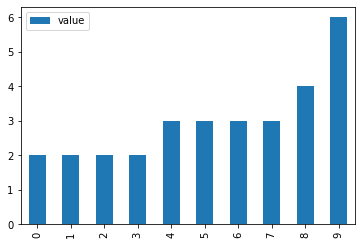

In [128]:
df_throws.plot(kind = "bar")

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130c11a00>]],
      dtype=object)

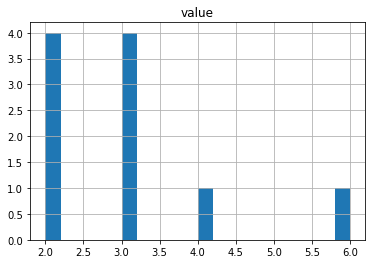

In [129]:
df_throws.hist(ylabelsize=10, bins = 20)

In [130]:
df_throws["count"] = 1
df_throws = df_throws.groupby("value", as_index = False).count()
df_throws

,value,count
0,2,4
1,3,4
2,4,1
3,6,1


## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [131]:
def mean_calculation_list(throws_info):
    nominator = sum(throws_info)
    denominator = len(throws_info)
    
    return nominator/denominator

mean_of_throws = mean_calculation_list(throws)
mean_of_throws 

3.0

In [132]:
def mean_calculation_df(throws_df, column):
    nominator = throws_df[column].sum()
    denominator = throws_df[column].shape[0]
    
    return nominator/denominator

mean_calculation_df(df_throws, "value")

3.75

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [133]:
def frequency_distribution_list(throws_info):   
    throws_freq = {x:throws_info.count(x) for x in throws_info}
    throws_result, frequency = throws_freq.keys(), throws_freq.values()
    return throws_freq

frequency_distribution_list(throws)

{2: 4, 3: 4, 4: 1, 6: 1}

In [134]:
def frequency_distribution_df_from_raw(throws_df, Column):   
    throws_df["count"] = 1 
    grouped = throws_df.groupby(Column, as_index = False).count()
    return grouped

frequency_distribution_df_from_raw(df_throws, "value")

,value,count
0,2,1
1,3,1
2,4,1
3,6,1


In [135]:
mean_of_frequencies = mean_calculation_list(frequency_distribution_list(throws).values())
mean_of_frequencies

2.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [189]:
def median_calculation_list(throws_info): 
    sorted_info = sorted(throws_info)
    halfway = int(len(throws_info) / 2)
    if len(throws_info) % 2 == 0:
        median = (sorted_info[halfway-1] + sorted_info[halfway]) / 2
    else:
        median = sorted_info[halfway]
    return median

median  = median_calculation_list(throws)

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [192]:
def quartiles_calculation_list(lst):
    lst = sorted(lst)
    length = len(lst)
    half = int(length/2)
    if length % 2 == 0:  
        lst1 = lst[:half]
        lst2 = lst[half:]
    else:
        lst1 = lst[:half]
        lst2 = lst[half+1:]
        
    q1 = median_calculation_list(lst1)
    q3 = median_calculation_list(lst2)
        
    return q1, q3

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [85]:
df_dice_100_raw = pd.read_csv("../data/roll_the_dice_hundred.csv")

In [86]:
df_dice_100 = df_dice_100_raw.drop(columns =['Unnamed: 0'])

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [87]:
df_dice_100

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
...,...,...
95,95,4
96,96,6
97,97,1
98,98,3


In [88]:
mean_calculation(df_dice_100["value"])

NameError: name 'mean_calculation' is not defined

#### 3.- Now, calculate the frequency distribution.


In [89]:
df_dice_100_grouped = df_dice_100.groupby("value", as_index = False).count()
df_dice_100_grouped

,value,roll
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [90]:
df_dice_100 = df_dice_100.drop(columns =['roll'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13077a670>]],
      dtype=object)

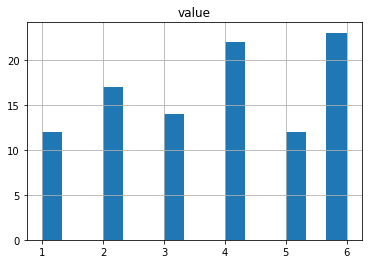

In [91]:
df_dice_100.hist(ylabelsize=10, bins = 15)

In [92]:
"""

from the graph the mean seams to be situated close (but before) the value 4 as around that point the frequencies
are equally distributed. In fact, the mean we calculated is 3.74.

"""

'\n\nfrom the graph the mean seams to be situated close (but before) the value 4 as around that point the frequencies\nare equally distributed. In fact, the mean we calculated is 3.74.\n\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [93]:
df_dice_1000_raw = pd.read_csv("../data/roll_the_dice_thousand.csv")

In [94]:
df_dice_1000 = df_dice_1000_raw.drop(columns = ["Unnamed: 0", "roll" ])
df_dice_1000

,value
0,5
1,6
2,1
3,6
4,5
...,...
995,1
996,4
997,4
998,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1308ad2b0>]],
      dtype=object)

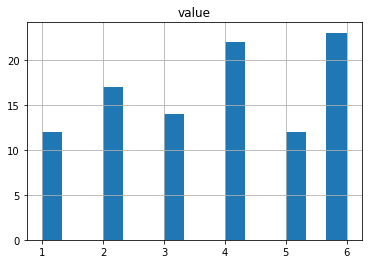

In [95]:
df_dice_100.hist(ylabelsize=10, bins = 15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130792e80>]],
      dtype=object)

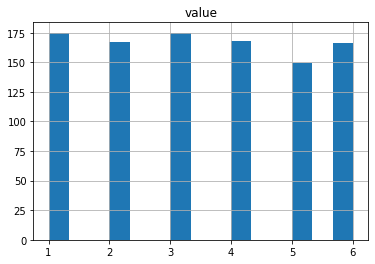

In [96]:
df_dice_1000.hist(bins = 15)

In [97]:
"""
The distribution of the dice_100 dataset is almost bimodal while for the dice_1000 is uniform.
"""

'\nThe distribution of the dice_100 dataset is almost bimodal while for the dice_1000 is uniform.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [98]:
df_ages_population_raw = pd.read_csv("../data/ages_population.csv")
df_ages_population_raw

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [99]:
freq_distribution_df = frequency_distribution_df_from_raw(df_ages_population_raw, "observation")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a512ee0>]],
      dtype=object)

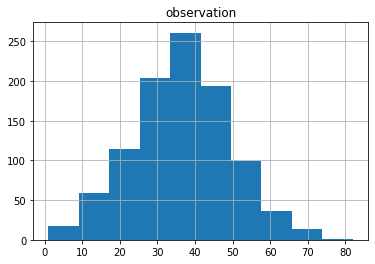

In [100]:
df_ages_population_raw = df_ages_population_raw.drop(columns = ["count"])
df_ages_population_raw.hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [101]:
"""As it is a normal distribution. I expect the mean to be in the center (before 40) and standard deviation 
should fall a bit more than 10 values to the right and left of the mean (range seens to contain around 68% of 
values)"""

mean_ages_1 = mean_calculation_df(df_ages_population_raw, "observation")
mean_ages_1

36.56

In [102]:
def st_dev(df, mean, column):
    temp = df.apply(lambda x: (x-mean)**2, axis=1)
    summation = temp[column].sum()
    denominator =  df.shape[0] 
    variance = summation / denominator
    return variance**(1/2)

st_dev_1 = st_dev(df_ages_population_raw, mean_ages, "observation")
st_dev_1

NameError: name 'mean_ages' is not defined

In [103]:
"""
Yes, the calculaton seams successful.
"""

'\nYes, the calculaton seams successful.\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [104]:
df_ages_population2_raw = pd.read_csv("../data/ages_population2.csv")
df_ages_population2_raw

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [105]:
frequency_distribution_df_from_raw(df_ages_population2_raw, "observation")

,observation,count
0,19.0,3
1,20.0,13
2,21.0,17
3,22.0,35
4,23.0,41
5,24.0,78
6,25.0,98
7,26.0,120
8,27.0,125
9,28.0,139


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130a3d610>]],
      dtype=object)

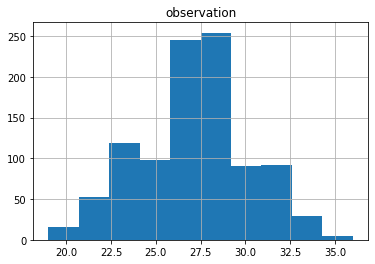

In [106]:
df_ages_population2_raw = df_ages_population2_raw.drop(columns = ["count"])
df_ages_population2_raw.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [107]:
"""
The distribution is still uniform, but the frequency is higher on values aoround the mean -> there are less outliers
"""

'\nThe distribution is still uniform, but the frequency is higher on values aoround the mean -> there are less outliers\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [108]:
mean_ages_2 = mean_calculation_df(df_ages_population2_raw, "observation")
mean_ages_2

27.155

In [109]:
st_dev_2 = st_dev(df_ages_population2_raw, mean_ages_2, "observation")
st_dev_2

2.9683286543103677

In [110]:
mean_ages_1

36.56

In [111]:
st_dev_1

NameError: name 'st_dev_1' is not defined

In [112]:
"""
mean_ages_1 = 36.56
mean_ages_2 = 27.155
st_dev_1 = 12.81
st_dev_2 = 15.89

The average population in the first dataset is older (36 vs 27 years old). In the second dataset the st dev 
is much lower cause the 70% of values seams to be all concentrated very close to the mean. 
"""

'\nmean_ages_1 = 36.56\nmean_ages_2 = 27.155\nst_dev_1 = 12.81\nst_dev_2 = 15.89\n\nThe average population in the first dataset is older (36 vs 27 years old). In the second dataset the st dev \nis much lower cause the 70% of values seams to be all concentrated very close to the mean. \n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [155]:
df_ages_population3_raw = pd.read_csv("../data/ages_population3.csv")
df_ages_population3_raw

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [156]:
mean_ages_3 = mean_calculation_df(df_ages_population3_raw, "observation")
mean_ages_3

41.989

In [157]:
st_dev_2 = st_dev(df_ages_population3_raw, mean_ages_3, "observation")
st_dev_2

16.13663158778808

In [158]:
"""
Population is getting older. Not only age mean is higher but also almost 70% of the people are around 42 years old.
If we plot the frequency distribution we can also see a major concentration on higher age groups. 

Also, population is spreading.
"""

'\nPopulation is getting older. Not only age mean is higher but also almost 70% of the people are around 42 years old.\nIf we plot the frequency distribution we can also see a major concentration on higher age groups.\n'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131152d90>]],
      dtype=object)

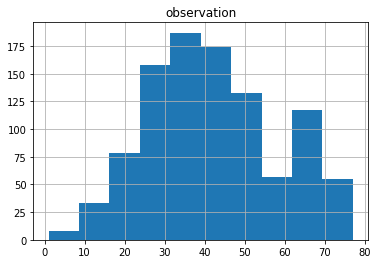

In [159]:
df_ages_population3_raw.hist()

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [183]:
quartiles_calculation_list(df_ages_population3_raw["observation"])

(40.0, 39.5)

In [194]:
#METHOD 1

Q1, Q3 = quartiles_calculation_list(df_ages_population3_raw["observation"])

median = median_calculation_list(df_ages_population3_raw["observation"])

print(Q1, "-", median)
print (median, "-", Q3)

30.0 - 40.0
40.0 - 53.0


In [193]:
#METHOD 2

Q1 = np.percentile(df_ages_population3_raw["observation"], 25)  # Q1

Median = np.percentile(df_ages_population3_raw["observation"], 50)  # median
0.5

Q3 = np.percentile(df_ages_population3_raw["observation"], 75)  # Q3

print(Q1, "-", Median)
print (Median, "-", Q3)

30.0 - 40.0
40.0 - 53.0


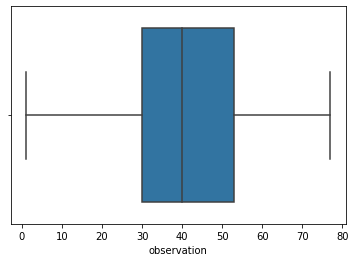

In [195]:
import seaborn as sns

sns.boxplot(x=df_ages_population3_raw["observation"])

In [197]:
mean_ages_3 - median

1.9889999999999972

In [187]:
"""

The mean and median are close, so the distribution is almost perfectlu symmetric. This also indicates that 50% of the
population is between the Q1 and Q3. 

In other words, half population ages between 20 and 53 years old.

"""

'\nThere is a mistake in the function.       \nre-check\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [188]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""